In [1]:
import numpy as np
from pynrnmf import NRNMF

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data matrix will be 4 points in a 6-dimensional space:

In [2]:
F = np.random.random((6,4))
F

array([[ 0.52035315,  0.21190404,  0.16154803,  0.33058813],
       [ 0.19942455,  0.58083252,  0.22475332,  0.04835734],
       [ 0.87835642,  0.85769541,  0.41853622,  0.35126015],
       [ 0.26708907,  0.55673204,  0.52227736,  0.24762171],
       [ 0.54233561,  0.51225247,  0.81816574,  0.08707735],
       [ 0.01988858,  0.92085306,  0.94557607,  0.53490611]])

The underlying network will be a 2-component graph. The first two points belong to a component, and the second two to another component:

In [3]:
W = np.array([[0,1,0,0], [1,0,0,0], [0,0,0,1], [0,0,1,0]])
W

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

I'm going to do a `k=2` decomposition (so that points may be plotted 2D).

NMF without graph regularization:

/home/yablee/Projects/PhD/projects/pynrnmf/pynrnmf/__init__.py:95: UserWarning: None of 20 runs converged after 200000 iterations each. Try increasing `max_iter`.
  warn("None of {} runs converged after {} iterations each. Try increasing `max_iter`.".format(self.n_inits, self.max_iter))


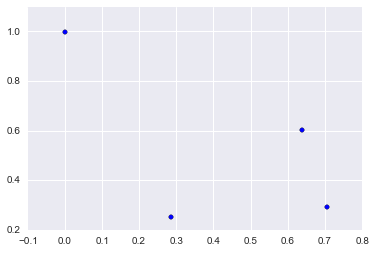

In [4]:
model_noreg = NRNMF(k=2, W=None, alpha=0, init='random', n_inits=20, max_iter=200000)
U_nr, V_nr = model_noreg.fit_transform(F)
plt.scatter(V_nr[:,0], V_nr[:,1])

With low regularization:

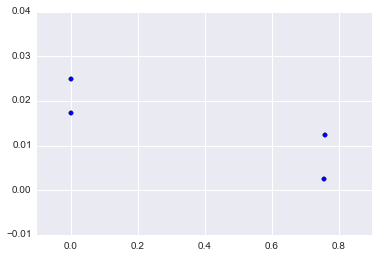

In [5]:
model_lowalpha = NRNMF(k=2, W=W, alpha=100, init='random', n_inits=10, max_iter=10000)
U_la, V_la = model_lowalpha.fit_transform(F)
plt.scatter(V_la[:,0], V_la[:,1])

And with high regularization

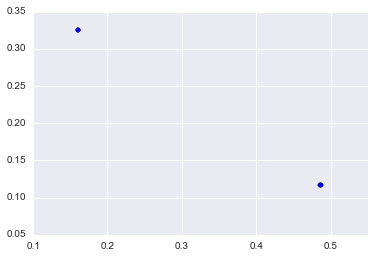

In [6]:
model = NRNMF(k=2, W=W, alpha=10000, init='random', n_inits=10, max_iter=200000)
U, V = model.fit_transform(F)
plt.scatter(V[:,0], V[:,1])